In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline




In [12]:
# Load the dataset
file_path = r"C:\Users\kehin\Downloads\archive (3)\insurance.csv"
df = pd.read_csv(file_path)

# Preview the data
print(df.head())
print(df.info())
print(df.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

In [14]:
# If target is 'avg_glucose_level' (replace 'charges' if different)
# y = df['avg_glucose_level']  # If this column exists
y = df['charges']  # Common in insurance datasets

# Drop the target from features
X = df.drop(['charges'], axis=1)

# Identify columns
cat_cols = ['sex', 'smoker', 'region']
num_cols = ['age', 'bmi', 'children']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ]
)


In [16]:
print(df.isnull().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [18]:
print(df.describe(include='all'))


                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    

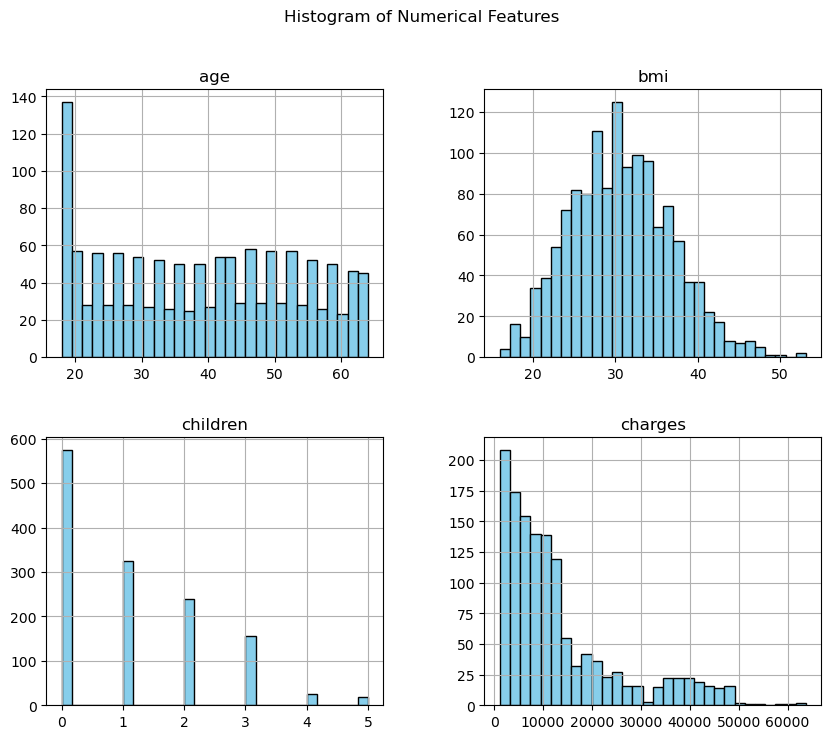

In [20]:
# Numerical columns
num_cols = ['age', 'bmi', 'children', 'charges']
df[num_cols].hist(bins=30, figsize=(10, 8), color='skyblue', edgecolor='black')
plt.suptitle("Histogram of Numerical Features")
plt.show()


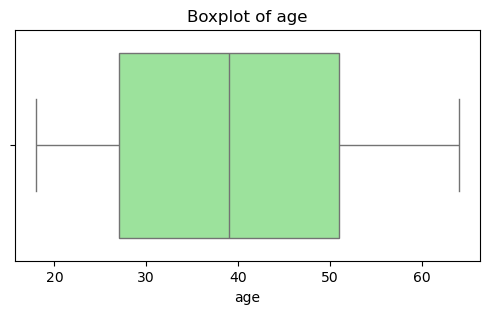

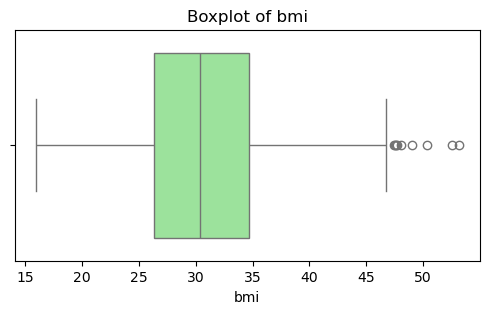

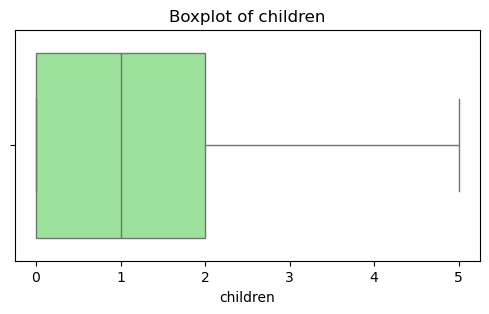

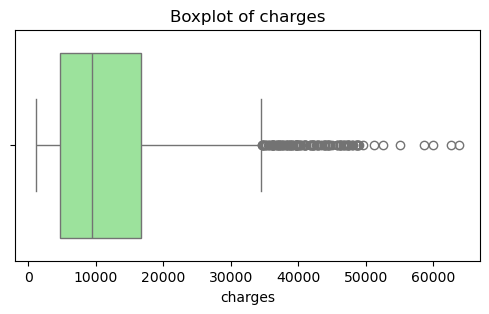

In [22]:
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()


C:\Users\kehin\AppData\Local\Temp\ipykernel_9880\802255435.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


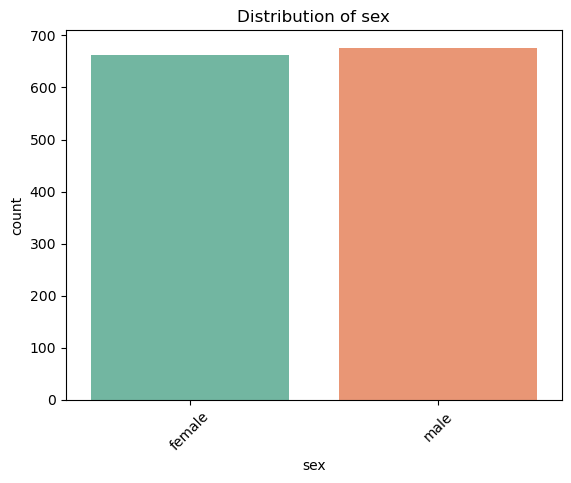

C:\Users\kehin\AppData\Local\Temp\ipykernel_9880\802255435.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


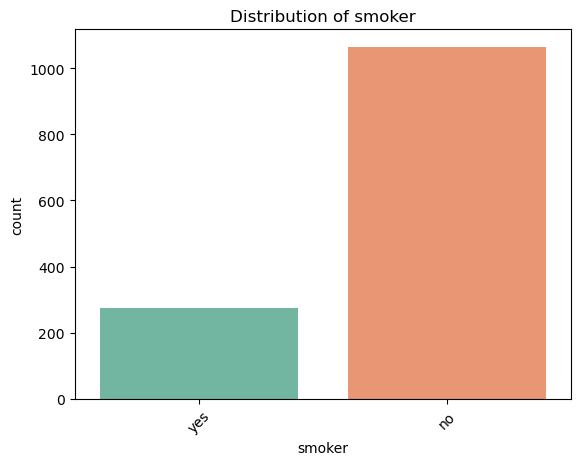

C:\Users\kehin\AppData\Local\Temp\ipykernel_9880\802255435.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


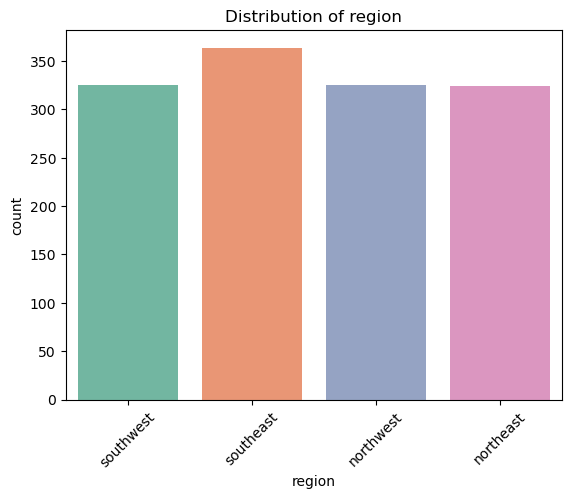

In [24]:
cat_cols = ['sex', 'smoker', 'region']
for col in cat_cols:
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()



C:\Users\kehin\AppData\Local\Temp\ipykernel_9880\3913759538.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


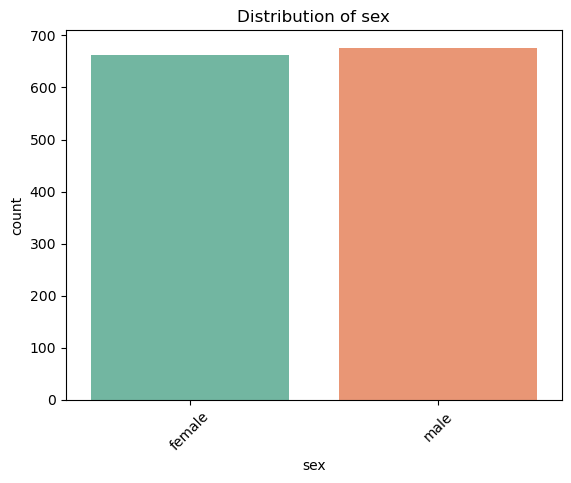

C:\Users\kehin\AppData\Local\Temp\ipykernel_9880\3913759538.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


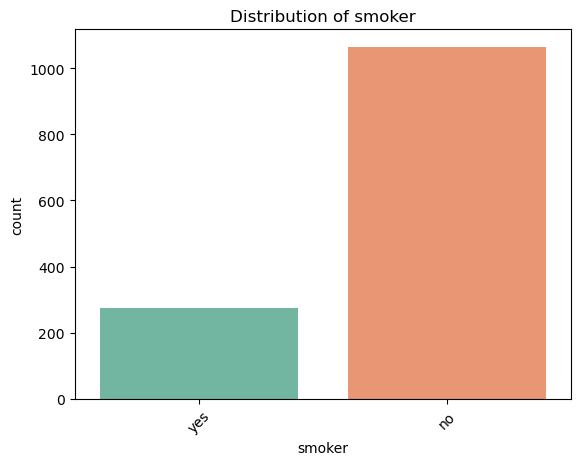

C:\Users\kehin\AppData\Local\Temp\ipykernel_9880\3913759538.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


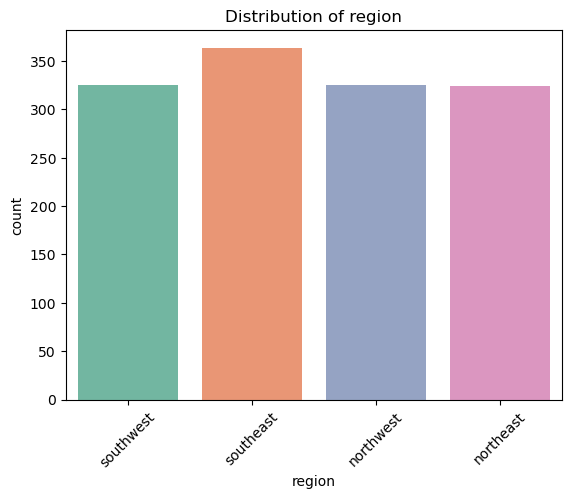

In [26]:
cat_cols = ['sex', 'smoker', 'region']
for col in cat_cols:
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


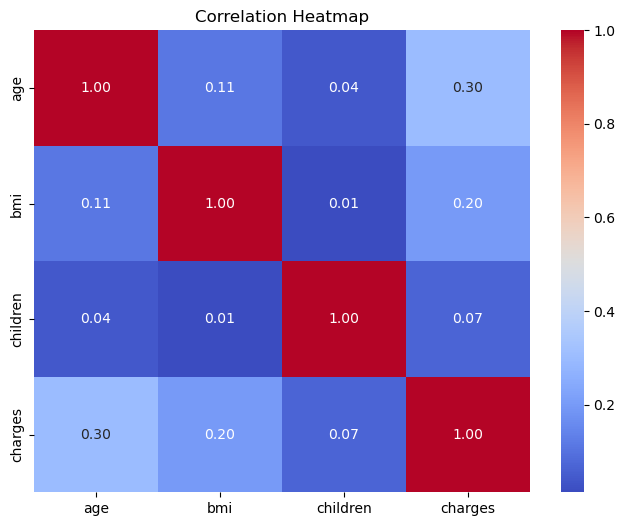

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



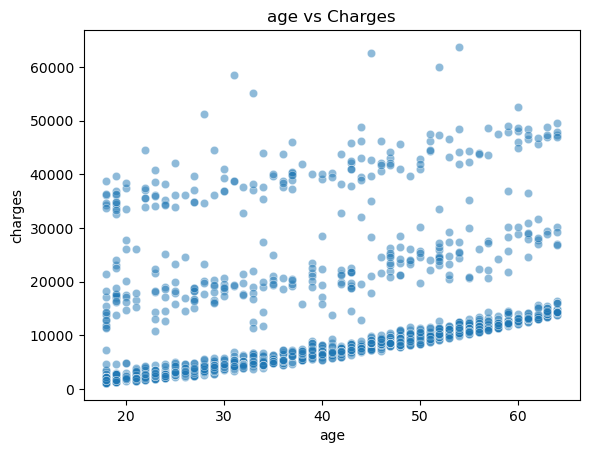

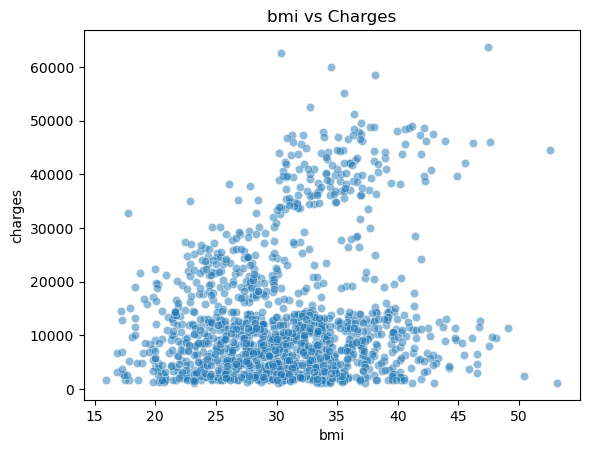

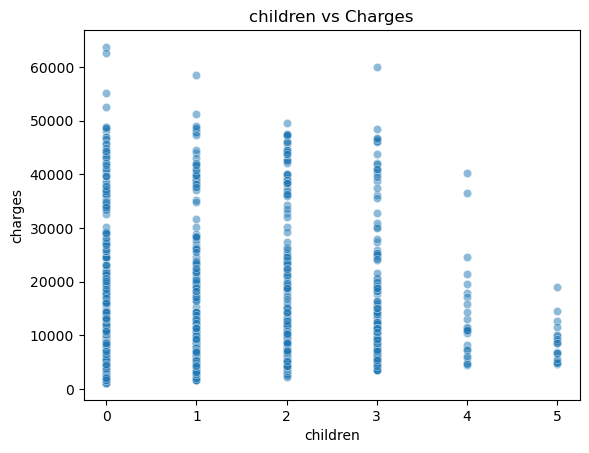

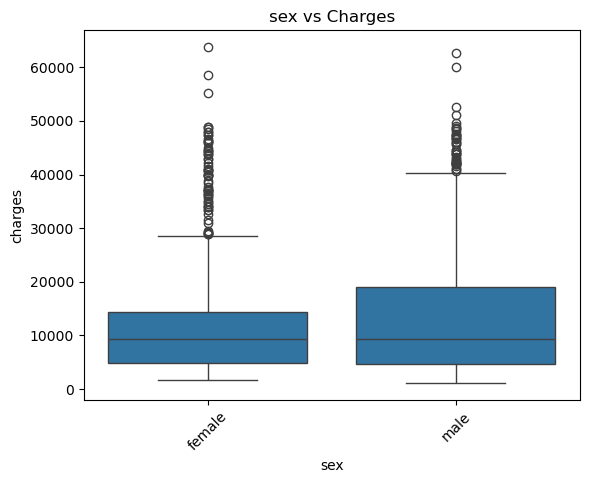

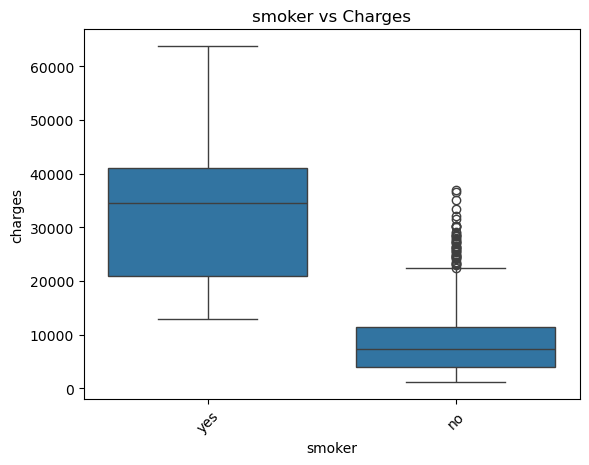

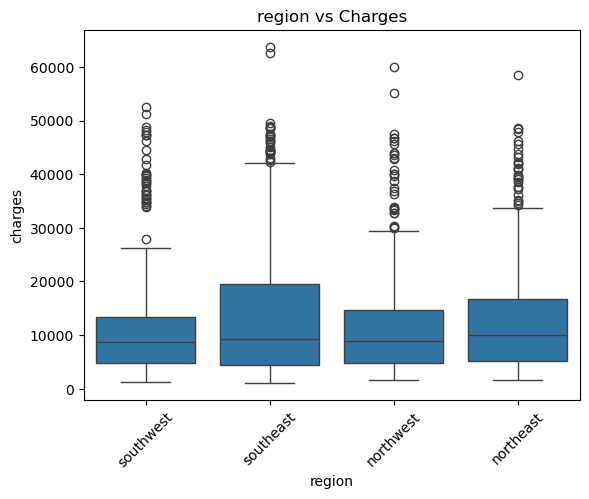

In [30]:
# Scatterplot for numerical vs target
for col in ['age', 'bmi', 'children']:
    sns.scatterplot(data=df, x=col, y='charges', alpha=0.5)
    plt.title(f'{col} vs Charges')
    plt.show()

# Boxplots for categorical vs target
for col in cat_cols:
    sns.boxplot(data=df, x=col, y='charges')
    plt.title(f'{col} vs Charges')
    plt.xticks(rotation=45)
    plt.show()


In [32]:
X = df.drop('charges', axis=1)
y = df['charges']


In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['age', 'bmi', 'children']),
        ('cat', OneHotEncoder(drop='first'), ['sex', 'smoker', 'region'])
    ]
)


In [36]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

In [39]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R² Score: {r2:.3f}')
print(f'RMSE: {rmse:.2f}')


R² Score: 0.784
RMSE: 5796.28


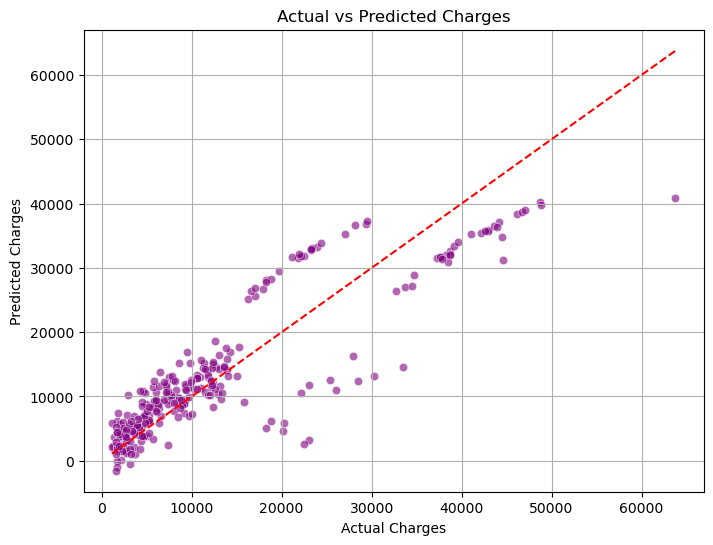

In [41]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.grid(True)
plt.show()


In [49]:
# Get the fitted preprocessor and regressor
preprocessor = model.named_steps['preprocessor']
regressor = model.named_steps['regressor']

# Define the original feature categories
num_features = ['age', 'bmi', 'children']
cat_features = ['sex', 'smoker', 'region']

# Get transformed categorical feature names
# This will only work after the model is fitted
encoded_cat = preprocessor.named_transformers_['cat']
encoded_cat_features = encoded_cat.get_feature_names_out(cat_features)

#  Combine numerical + encoded categorical names
all_features = np.concatenate([num_features, encoded_cat_features])

#  Match them with coefficients
coefficients = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': regressor.coef_
})

# Sort for readability
coefficients['abs_coef'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='abs_coef', ascending=False).drop(columns='abs_coef')

# Show results
print(coefficients)



            Feature   Coefficient
4        smoker_yes  23651.128856
7  region_southwest   -809.799354
6  region_southeast   -657.864297
2          children    425.278784
5  region_northwest   -370.677326
1               bmi    337.092552
0               age    256.975706
3          sex_male    -18.591692
